# Emissão de CO2

Neste exercício desenvolvido como parte do curso 'Machine Learning with Python' oferecido pela IBM através do Coursera, o objetivo é treinar e avaliar um modelo preditivo de Regressão Linear Simples para Emissão de CO2 a partir de caracteríticas do veículo.

Os datos estão no diretório 'data'.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

%matplotlib inline

## Carregando os dados

In [2]:
fuel_consumption_data = pd.read_csv('FuelConsumption.csv')

fuel_consumption_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Selecionando campos

In [3]:
select = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
new_fuel_consumption_data = fuel_consumption_data[select]
new_fuel_consumption_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## Exploração vizual

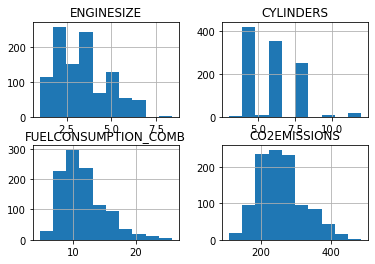

In [4]:
vizualization = new_fuel_consumption_data[select]
vizualization.hist()
plt.show()

### ENGINESIZE vs CO2EMISSION

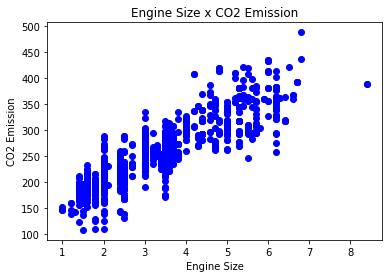

In [5]:
plt.scatter(new_fuel_consumption_data.ENGINESIZE, new_fuel_consumption_data.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.title('Engine Size x CO2 Emission')
plt.show()

### CYLINDERS vs CO2EMISSION

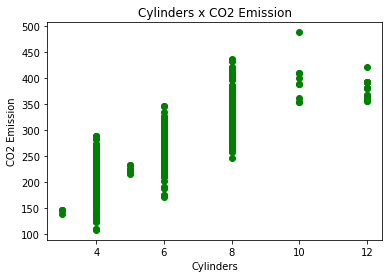

In [6]:
plt.scatter(new_fuel_consumption_data.CYLINDERS, new_fuel_consumption_data.CO2EMISSIONS, color='green')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission')
plt.title('Cylinders x CO2 Emission')
plt.show()

### FUELCONSUMPTION_COMB vs CO2EMISSION

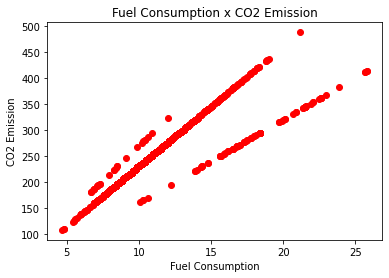

In [7]:
plt.scatter(new_fuel_consumption_data.FUELCONSUMPTION_COMB, new_fuel_consumption_data.CO2EMISSIONS, color = 'red')
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emission')
plt.title('Fuel Consumption x CO2 Emission')
plt.show()

## Treinando o modelo

O modelo tentará prever a emissão de CO2 (CO2EMISSIONS) a partir do tamanho do motor (ENGINESIZE)

### Separando amostras de treino e teste

In [8]:
#Máscara para divisão 80% para ttreino este e 20% para teste
msk = np.random.rand(len(fuel_consumption_data)) < 0.8

#Dataset de treino
train = new_fuel_consumption_data[msk]

#Dataset de teste
test = new_fuel_consumption_data[~msk]


In [9]:
from sklearn import linear_model

model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

model.fit(train_x, train_y)

print(f'Obtemos {model.coef_} como coeficiente angular (slope) e {model.intercept_} como coeficiente linear (intercept)')

Obtemos [[39.34685776]] como coeficiente angular (slope) e [124.22425625] como coeficiente linear (intercept)


### Visualizando o modelo

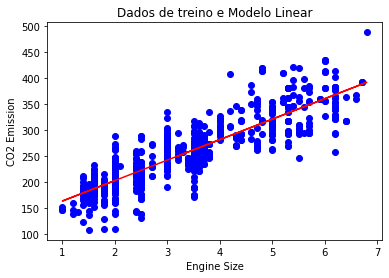

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.title('Dados de treino e Modelo Linear')
plt.show()

### Avaliando o modelo

In [11]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = model.predict(test_x)

# Métricas de erro
print(f'Mean absolute error: {np.round(np.mean(np.absolute(test_y_hat - test_y)), 2)}')
print(f'Residual sum of squares: {np.round(np.mean((test_y_hat - test_y) ** 2), 2)}')

# Métrica de acurácia
print(f'R2 Score: {np.round(r2_score(test_y_hat, test_y), 2)}')


Mean absolute error: 22.43
Residual sum of squares: 849.42
R2 Score: 0.74
